In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
import numpy as np 
import seaborn as sns
import math
import warnings
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/globalterrorismdb/globalterrorismdb_0718dist.csv


In [2]:
terrorist_data = pd.read_csv('/kaggle/input/globalterrorismdb/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
terrorist_data.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [4]:
terrorist_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
terrorist_data.shape

(181691, 135)

In [6]:
terrorist_data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
terrorist_data=terrorist_data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [8]:
terrorist_data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [9]:
terrorist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [10]:
print("The Most Common types of Attack:",terrorist_data['AttackType'].value_counts().idxmax())
print("The Group with the maximum number of attacks:",terrorist_data['Group'].value_counts().index[1])
print("The Year with the maximum number of attacks:",terrorist_data['Year'].value_counts().idxmax())
print("The Month with the maximum number of attacks:",terrorist_data['Month'].value_counts().idxmax())
print("The Country with the maximum number of attacks:",terrorist_data['Country'].value_counts().idxmax())
print("The City with the maximum number of attacks:",terrorist_data['city'].value_counts().index[1]) #as first entry is 'unknown'
print("The Region with the maximum number of attacks:",terrorist_data['Region'].value_counts().idxmax())





The Most Common types of Attack: Bombing/Explosion
The Group with the maximum number of attacks: Taliban
The Year with the maximum number of attacks: 2014
The Month with the maximum number of attacks: 5
The Country with the maximum number of attacks: Iraq
The City with the maximum number of attacks: Baghdad
The Region with the maximum number of attacks: Middle East & North Africa


In [11]:
terrorist_data['Total_Affected'] = terrorist_data['Killed'] + terrorist_data['Wounded']
terrorist_data.head(10)

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Total_Affected
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN,0.0
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN,0.0
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,0.0
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0.0


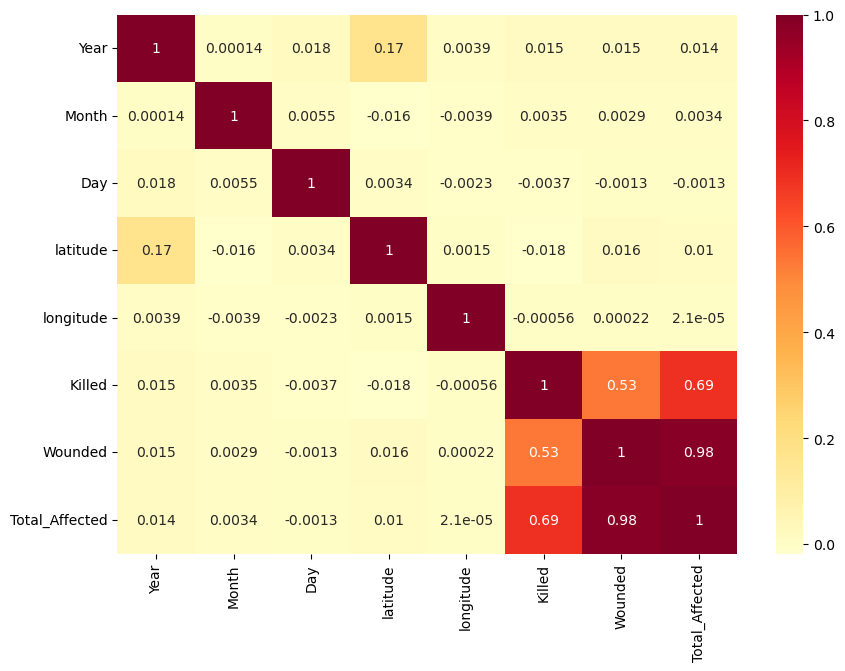

In [12]:
corr = terrorist_data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot =  True, cmap = 'YlOrRd')
plt.show()

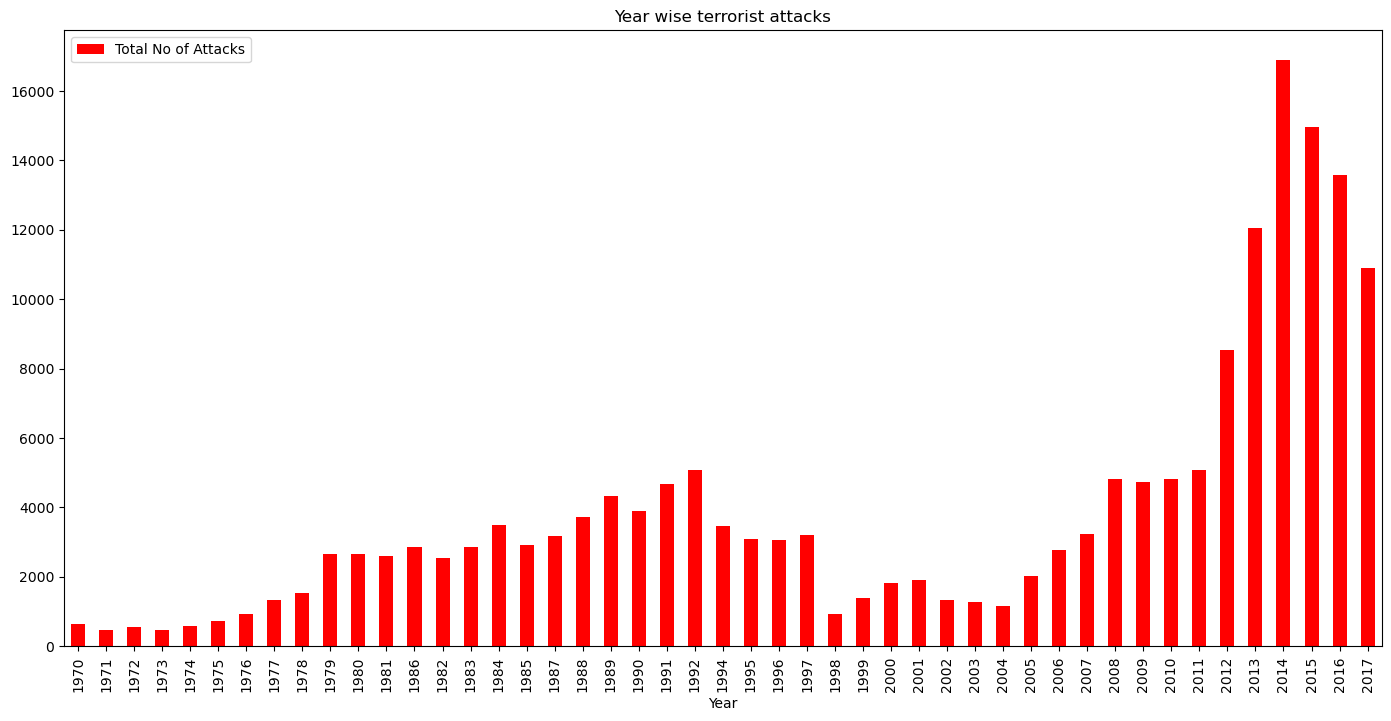

In [13]:
year_wise_attacks = []
rev=terrorist_data['Year'].unique()

for i in rev:
    year_wise_attacks.append([i , len(terrorist_data[terrorist_data['Year'] ==i])])
    
pd.DataFrame(year_wise_attacks,columns = ['Year','Total No of Attacks']).plot(x = "Year", y = "Total No of Attacks", title='Year wise terrorist attacks',kind = 'bar',color='r',figsize = (17,8))

plt.legend()
# We observe the maximum number of attacks in the year 2014 and from then they are being reduced

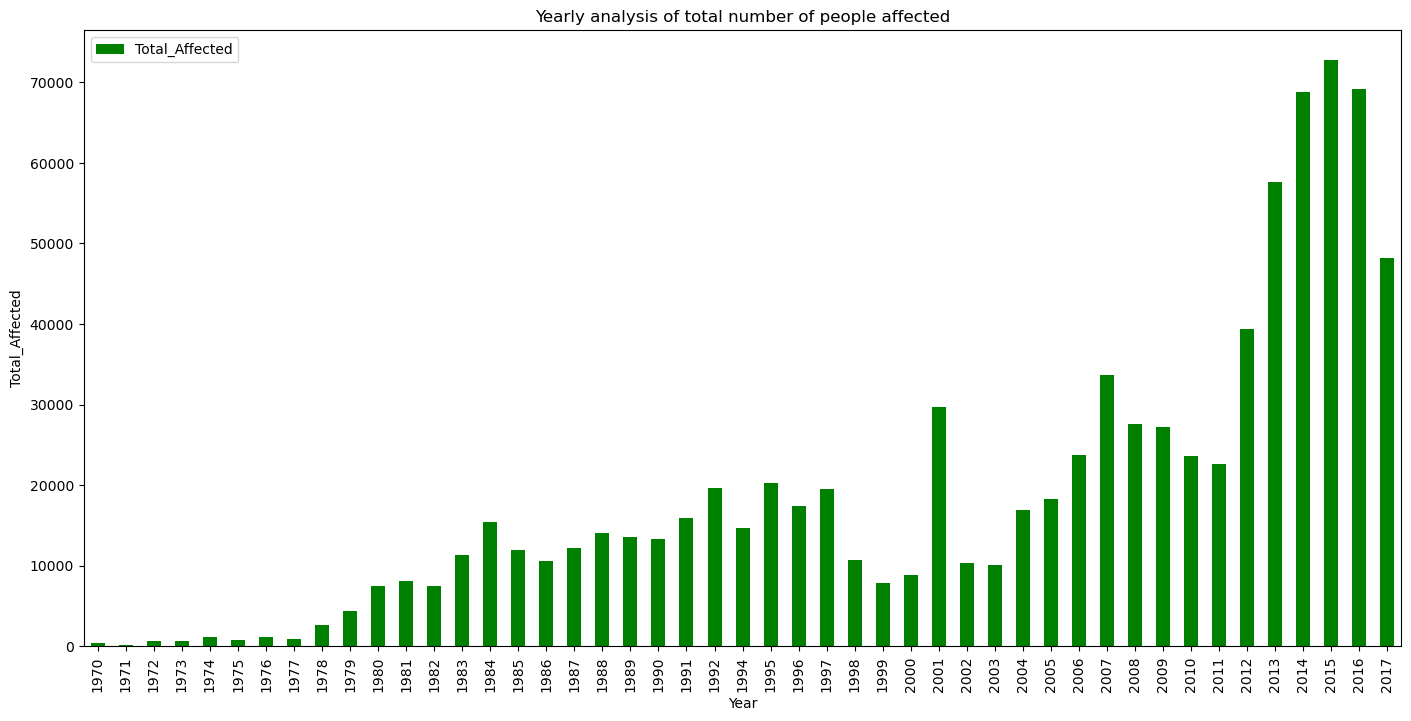

In [14]:
total_affected_per_year=terrorist_data.groupby('Year')['Total_Affected'].sum()
total_affected_per_year.plot.bar(xlabel='Year',ylabel='Total_Affected',title='Yearly analysis of total number of people affected',color='g',figsize=(17,8))

plt.legend()
#Though the number of terrorist attacks are heigher in 2014, More number of people are affected(killed+wounded) in 2015 around 70000 people affected compared to 2014 , but from then the number of attacks are reduced but still it is 45000 in 2017 which is also a alarming count

In [15]:
country = terrorist_data['Country'].value_counts()
print("Number of Countries affected by Terrorist Attacks :", len(country))

Number of Countries affected by Terrorist Attacks : 205


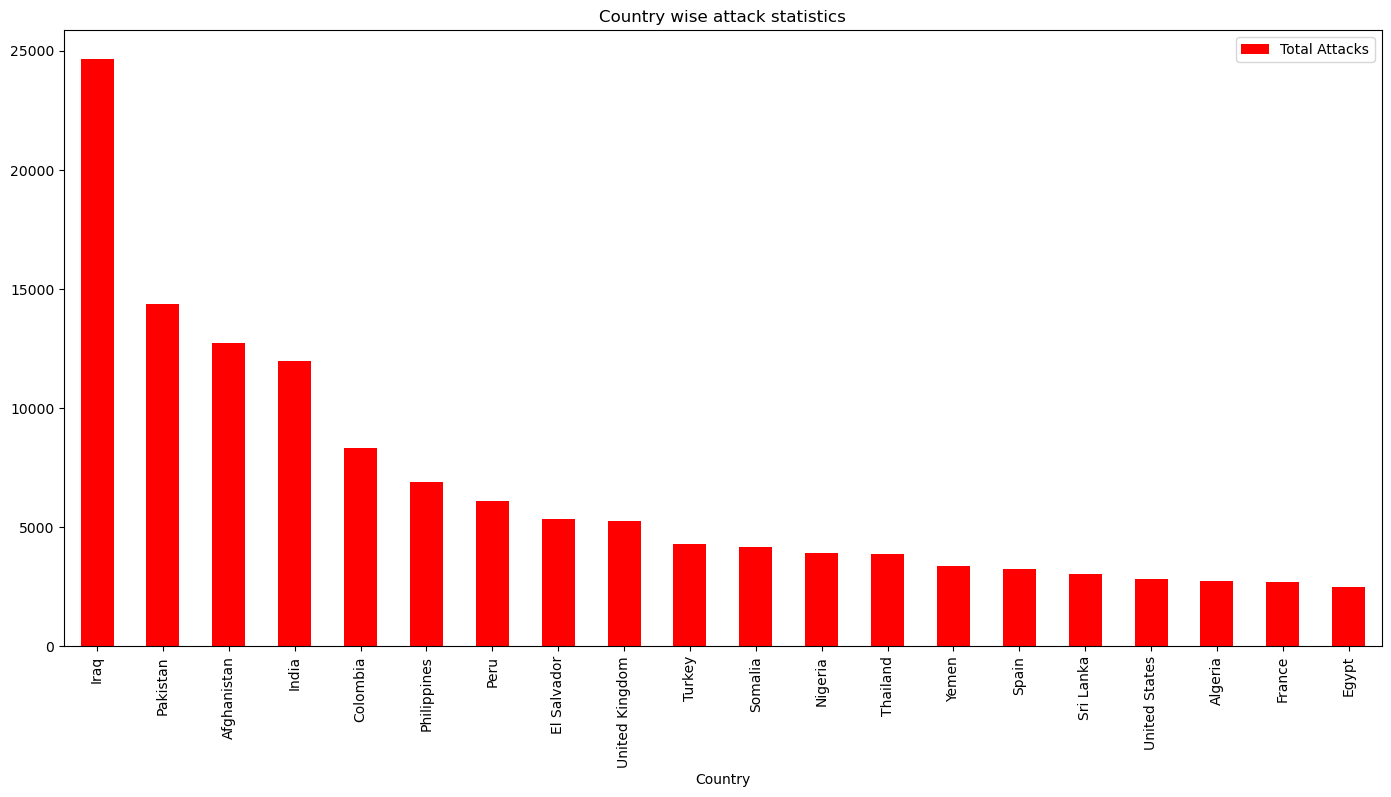

In [16]:
country_wise_count = []

for i in terrorist_data['Country'].value_counts()[0:20].index:
    country_wise_count.append([i , len(terrorist_data[terrorist_data['Country'] ==i])])
    
pd.DataFrame(country_wise_count,columns = ['Country','Total Attacks']).sort_values(by='Total Attacks', ascending=False).plot(x = "Country", y = "Total Attacks", title='Country wise attack statistics',kind = 'bar',color='red',figsize = (17,8))

plt.legend()
#Iraq is the country with the heighst number of terrorist attacks, while india is rank 4 in terrorist attacks
#The below graph shows the Top 20 countries in terms of most number of terrorist attacks.

In [17]:
affected_country_wise = terrorist_data.groupby('Country')['Total_Affected'].sum().to_frame().reset_index().sort_values('Total_Affected', ascending=False)
affected_country_wise=affected_country_wise.head(20)
affected_country_wise 

,Country,Total_Affected
84,Iraq,202982.0
0,Afghanistan,80213.0
134,Pakistan,64427.0
80,India,47108.0
167,Sri Lanka,29792.0
189,United States,24469.0
35,Colombia,23767.0
140,Philippines,22361.0
130,Nigeria,21728.0
175,Syria,21614.0


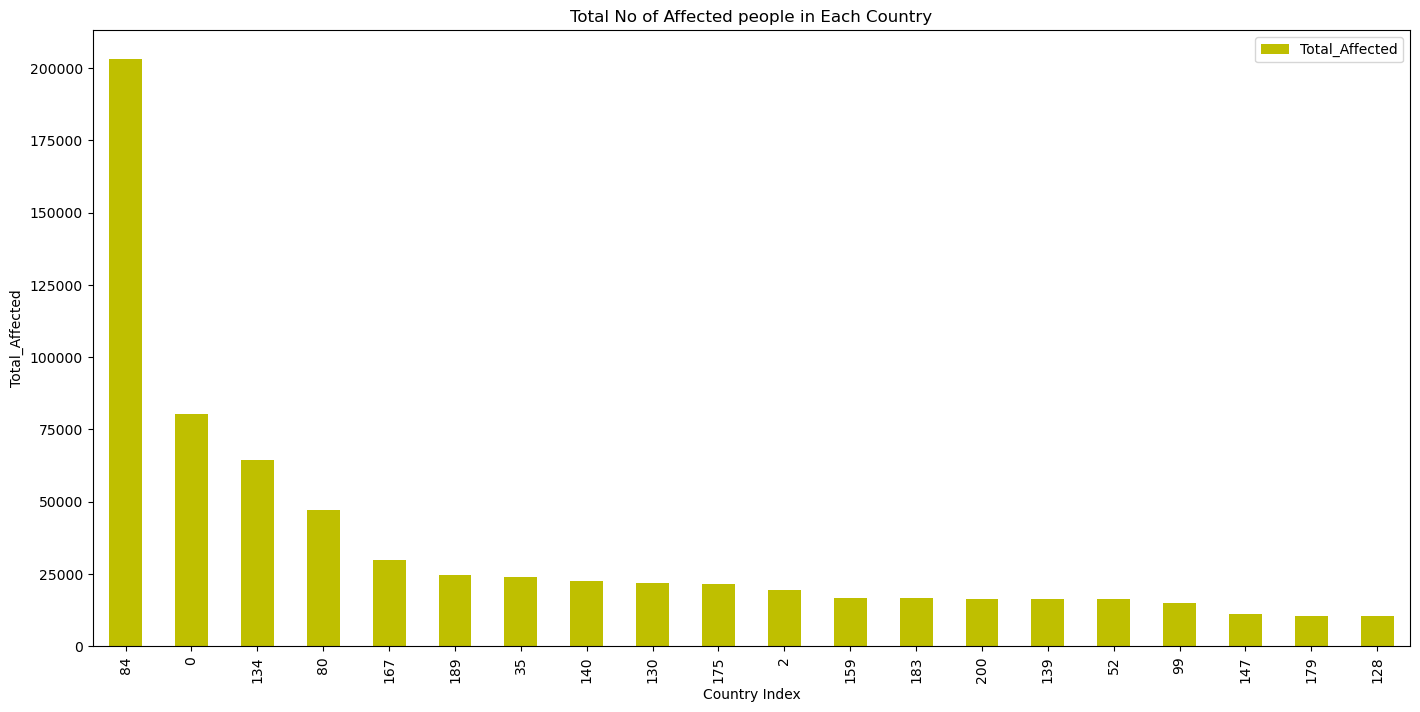

In [18]:
affected_country_wise.plot.bar(xlabel='Country Index',ylabel='Total_Affected',title='Total No of Affected people in Each Country',color='y',figsize=(17,8))

plt.legend()
#Iraq is the country with the most number of Affected people of all the attacks

In [19]:
affected_state_wise = terrorist_data['state'].value_counts()
print("Number of States affected by Terrorist Attacks :", len(affected_state_wise))
affected_state_wise

Number of States affected by Terrorist Attacks : 2855


Baghdad                  7645
Northern Ireland         4498
Unknown                  4290
Balochistan              3710
Saladin                  3411
                         ... 
Federal Territory           1
Topaz (Province)            1
Obilic (Municipality)       1
East Timor (Region)         1
Vidzeme                     1
Name: state, Length: 2855, dtype: int64

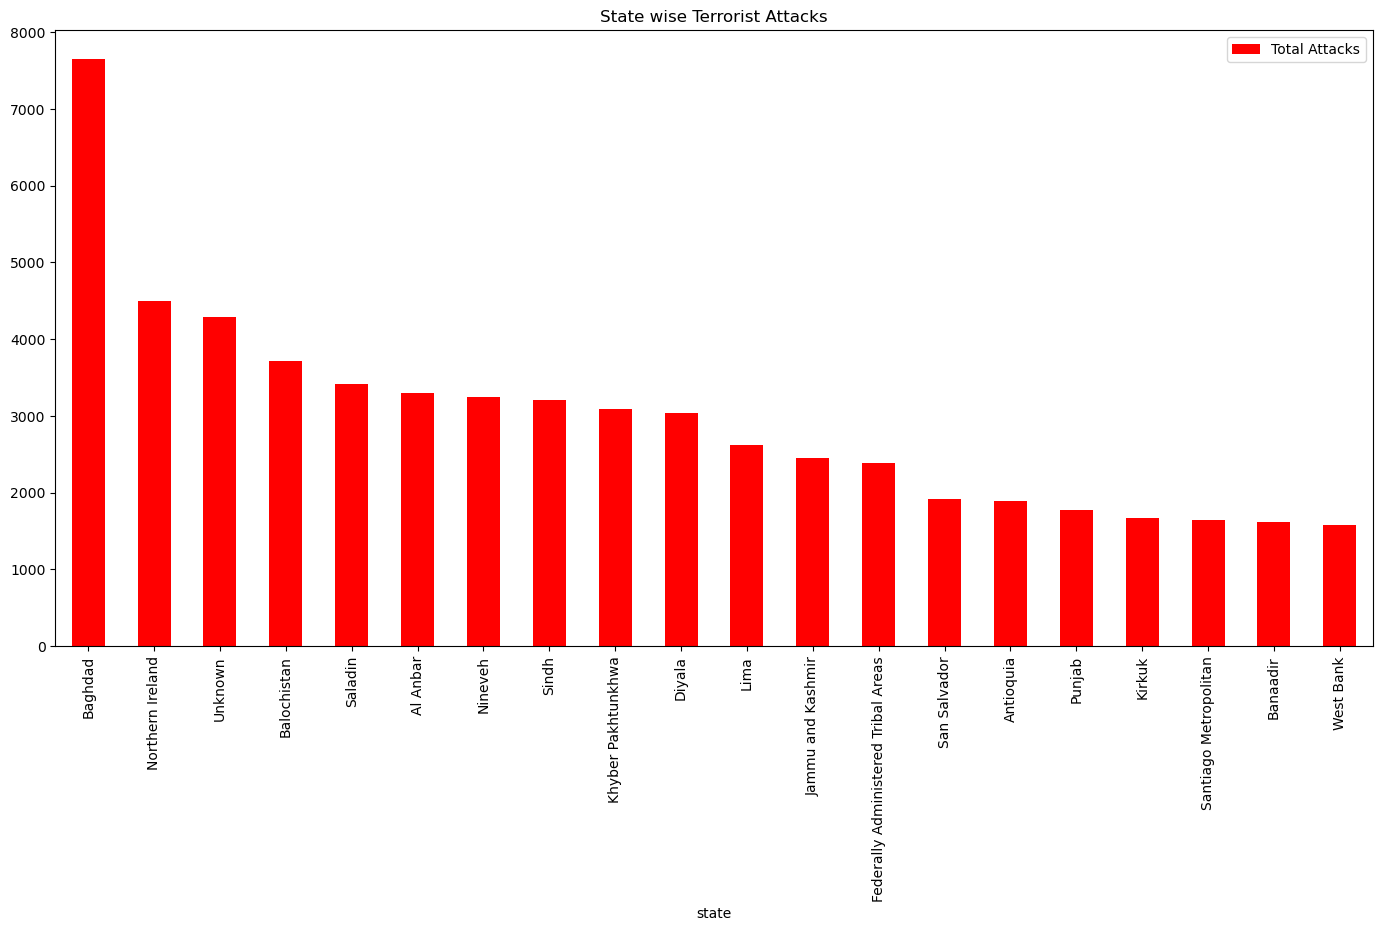

In [20]:
state_wise_attacks = []

for i in terrorist_data['state'].value_counts()[0:20].index:
    state_wise_attacks.append([i , len(terrorist_data[terrorist_data['state'] ==i])])
    
pd.DataFrame( state_wise_attacks,columns = ['state','Total Attacks']).sort_values(by='Total Attacks', ascending=False).plot(x = "state", y = "Total Attacks", title='State wise Terrorist Attacks',kind = 'bar',color='r',figsize = (17,8))

plt.legend()
#Baghdad is the most affected state by terrorist attacks 

In [21]:
region_wise_attacks = terrorist_data['Region'].value_counts()
print("The totaL nO of Regions affected by the Terrorists :", len(region_wise_attacks))

The totaL nO of Regions affected by the Terrorists : 12


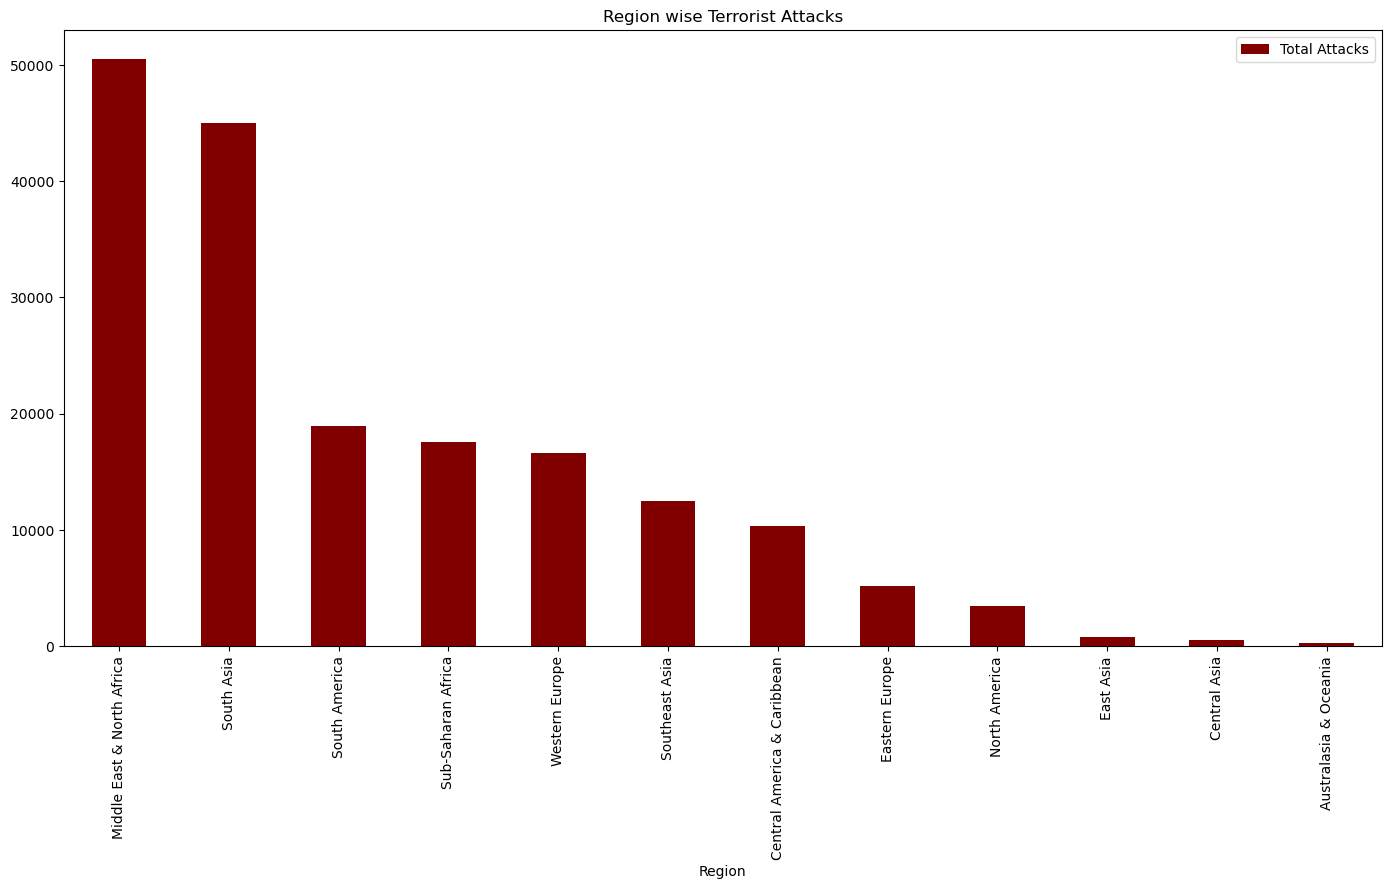

In [22]:
region_wise_attacks = []

for i in terrorist_data['Region'].value_counts().index:
    region_wise_attacks.append([i , len(terrorist_data[terrorist_data['Region'] ==i])])
    
pd.DataFrame(region_wise_attacks,columns = ['Region','Total Attacks']).sort_values(by='Total Attacks', ascending=False).plot(x = "Region", y = "Total Attacks", title='Region wise Terrorist Attacks',kind = 'bar',color='maroon',figsize = (17,8))

plt.legend()
#Middle East and North Africa is the most affected region by terrorist attacks with 50K+ Terrorist Attacks.

In [23]:
terrorist_group_wise_attacks = terrorist_data['Group'].value_counts()
print("The total no Terrorist groups that attacked :", len(terrorist_group_wise_attacks))

The total no Terrorist groups that attacked : 3537


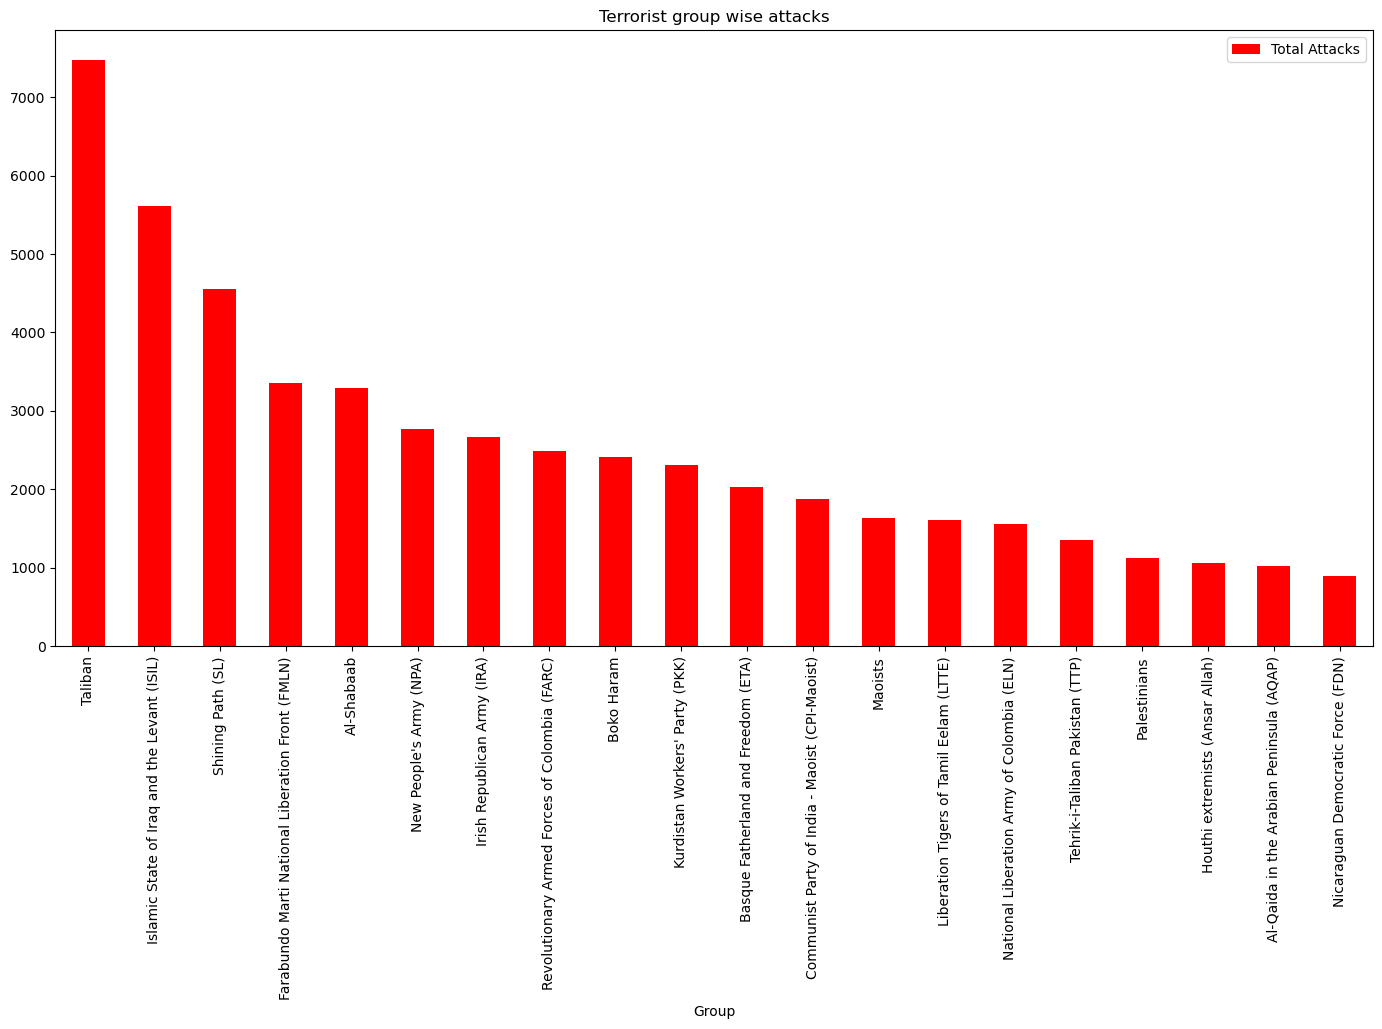

In [24]:
terrorist_group_wise_attacks = []

for i in terrorist_data['Group'].value_counts()[1:21].index:
    terrorist_group_wise_attacks.append([i , len(terrorist_data[terrorist_data['Group'] ==i])])
    
pd.DataFrame(terrorist_group_wise_attacks,columns = ['Group','Total Attacks']).sort_values(by='Total Attacks', ascending=False).plot(x = "Group", y = "Total Attacks", title='Terrorist group wise attacks',kind = 'bar',color='r',figsize = (17,8))

plt.legend()
#Taliban is the terrorist group with most no. of attacks 

In [25]:
terrorist_attack_type_wise = terrorist_data['AttackType'].value_counts()
print("The no of types of attacks:", len(terrorist_attack_type_wise))

The no of types of attacks: 9


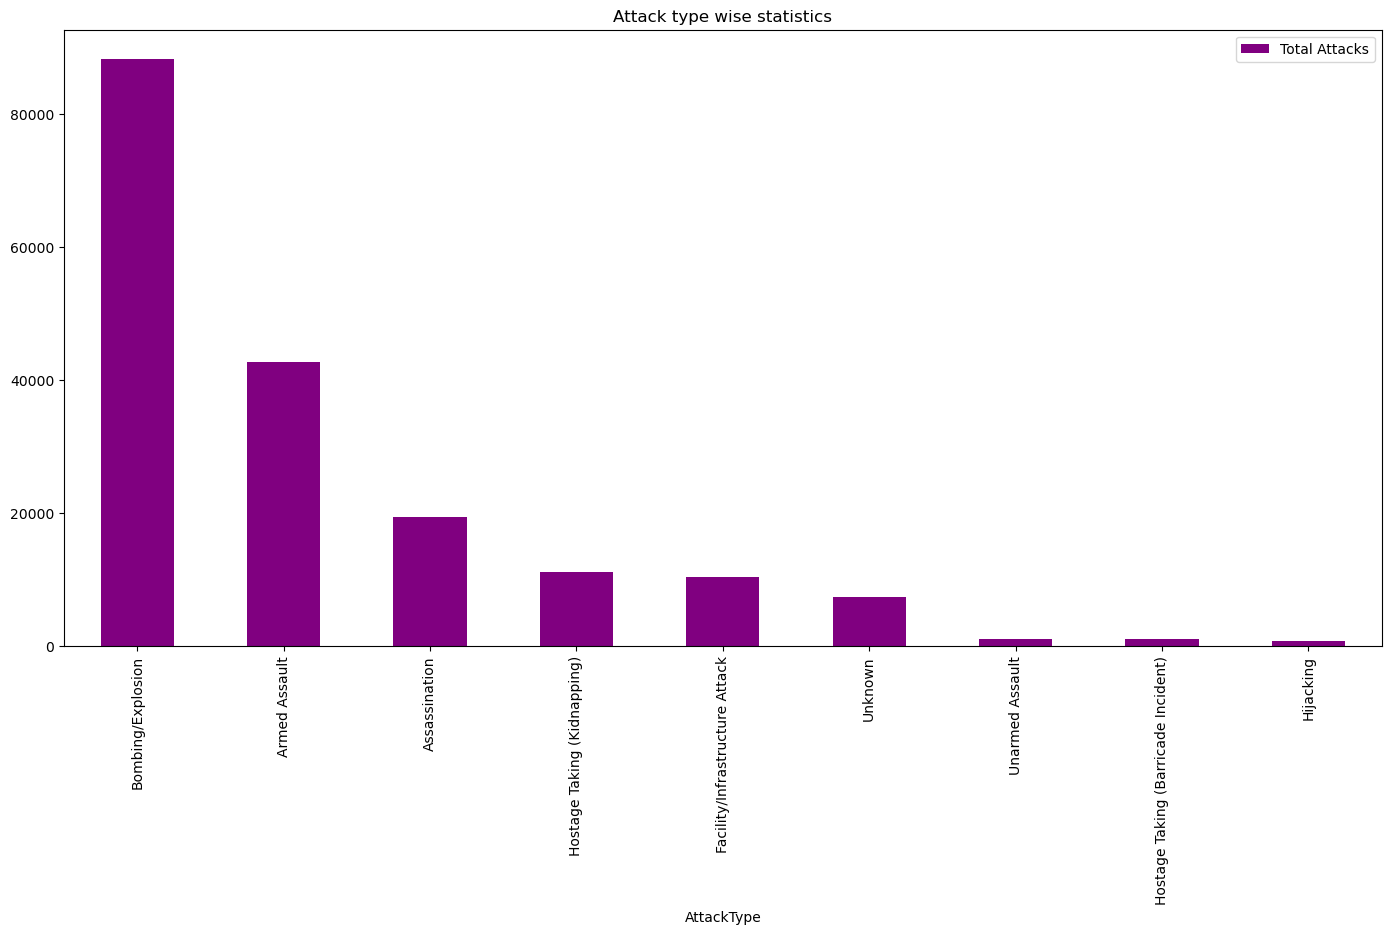

In [26]:
terrorist_attack_type_wise = []

for i in terrorist_data['AttackType'].value_counts().index:
    terrorist_attack_type_wise.append([i , len(terrorist_data[terrorist_data['AttackType'] ==i])])
    
pd.DataFrame(terrorist_attack_type_wise,columns = ['AttackType','Total Attacks']).sort_values(by='Total Attacks', ascending=False).plot(x = "AttackType", y = "Total Attacks", title='Attack type wise statistics',kind = 'bar',color='purple',figsize = (17,8))

plt.legend()
#Bombing/Explosion is the most used attack type by terrorists.

In [27]:
terrorist_target_type_wise = terrorist_data['Target'].value_counts()
print("The no of types of targets:", len(terrorist_target_type_wise))

The no of types of targets: 86006


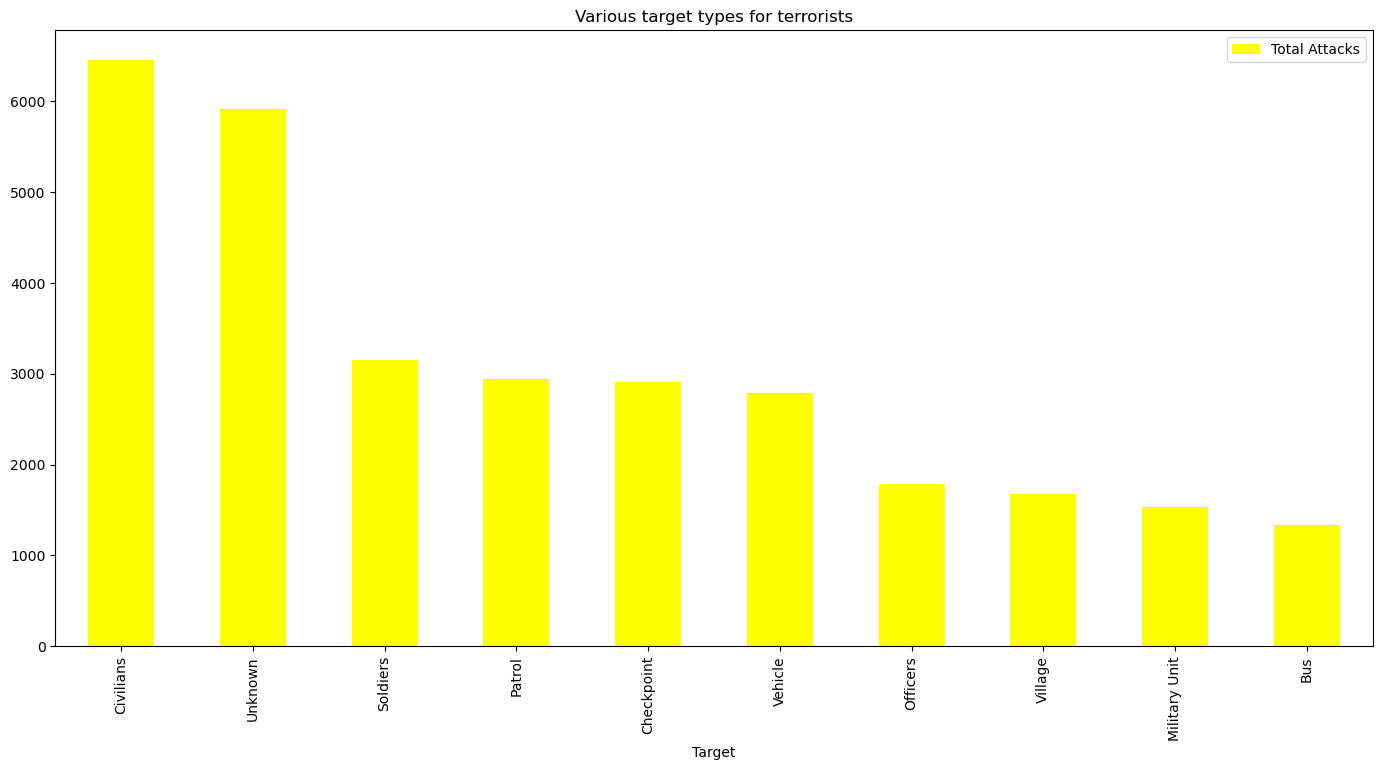

In [28]:
target_types= []

for ind in terrorist_data['Target'].value_counts()[0:10].index:
   target_types.append([ind , len(terrorist_data[terrorist_data['Target'] ==ind])])

plot_data=pd.DataFrame(target_types,columns = ['Target','Total Attacks']).sort_values(by='Total Attacks', ascending=False).plot(x = "Target", y = "Total Attacks", title='Various target types for terrorists',kind = 'bar',color='yellow',figsize = (17,8))

plt.legend()
#Civilians is the most frequent target type of terrorists.